In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
dataset=pd.read_csv(r"C:\Users\narla\OneDrive\Desktop\python\KDD.csv")
dataset

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0             0          icmp   eco_i   SF         18          0     0   
1            69           tcp  telnet   SF        331       2762     0   
2             0          icmp   eco_i   SF         18          0     0   
3             0          icmp   eco_i   SF         18          0     0   
4             0          icmp   eco_i   SF         18          0     0   
...         ...           ...     ...  ...        ...        ...   ...   
11573         0          icmp   ecr_i   SF       1032          0     0   
11574         0          icmp   ecr_i   SF       1032          0     0   
11575         0          icmp   ecr_i   SF       1032          0     0   
11576         0          icmp   ecr_i   SF       1032          0     0   
11577         0          icmp   ecr_i   SF       1032          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                   0       0    0  ...                   1   
1                   0       0    0  ...                   1   
2                   0       0    0  ...                   2   
3                   0       0    0  ...                  71   
4                   0       0    0  ...                  78   
...               ...     ...  ...  ...                 ...   
11573               0       0    0  ...                 255   
11574               0       0    0  ...                 255   
11575               0       0    0  ...                 255   
11576               0       0    0  ...                 255   
11577               0       0    0  ...                 255   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         1.0                    0.00   
1                         0.0                    0.01   
2                         1.0                    0.00   
3                         1.0                    0.00   
4                         1.0                    0.00   
...                       ...                     ...   
11573                     1.0                    0.00   
11574                     1.0                    0.00   
11575                     1.0                    0.00   
11576                     1.0                    0.00   
11577                     1.0                    0.00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              1.0                          0.0   
1                              0.0                          0.0   
2                              1.0                          1.0   
3                              1.0                          1.0   
4                              1.0                          1.0   
...                            ...                          ...   
11573                          1.0                          0.0   
11574                          1.0                          0.0   
11575                          1.0                          0.0   
11576                          1.0                          0.0   
11577                          1.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   0.0   
2                       0.0                       0.0                   0.0   
3                       0.0                       0.0                   0.0   
4                       0.0                       0.0                   0.0   
...                     ...                       ...                   ...   
11573                   0.0                       0.0                   0.0   
11574                   0.0                       0.0                   0.0   
11575                   0.0                       0.0                   0.0   
11576                   0.0                       0.0                   0.0   
11

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11578 non-null  int64  
 1   protocol_type                11578 non-null  object 
 2   service                      11578 non-null  object 
 3   flag                         11578 non-null  object 
 4   src_bytes                    11578 non-null  int64  
 5   dst_bytes                    11578 non-null  int64  
 6   land                         11578 non-null  int64  
 7   wrong_fragment               11578 non-null  int64  
 8   urgent                       11578 non-null  int64  
 9   hot                          11578 non-null  int64  
 10  num_failed_logins            11578 non-null  int64  
 11  logged_in                    11578 non-null  int64  
 12  num_compromised              11578 non-null  int64  
 13  root_shell      

In [3]:
dataset.isnull()

duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0         False          False    False  False      False      False  False   
1         False          False    False  False      False      False  False   
2         False          False    False  False      False      False  False   
3         False          False    False  False      False      False  False   
4         False          False    False  False      False      False  False   
...         ...            ...      ...    ...        ...        ...    ...   
11573     False          False    False  False      False      False  False   
11574     False          False    False  False      False      False  False   
11575     False          False    False  False      False      False  False   
11576     False          False    False  False      False      False  False   
11577     False          False    False  False      False      False  False   

       wrong_fragment  urgent    hot  ...  dst_host_srv_count  \
0               False   False  False  ...               False   
1               False   False  False  ...               False   
2               False   False  False  ...               False   
3               False   False  False  ...               False   
4               False   False  False  ...               False   
...               ...     ...    ...  ...                 ...   
11573           False   False  False  ...               False   
11574           False   False  False  ...               False   
11575           False   False  False  ...               False   
11576           False   False  False  ...               False   
11577           False   False  False  ...               False   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
11573                   False                   False   
11574                   False                   False   
11575                   False                   False   
11576                   False                   False   
11577                   False                   False   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                            False                        False   
1                            False                        False   
2                            False                        False   
3                            False                        False   
4                            False                        False   
...                            ...                          ...   
11573                        False                        False   
11574                        False                        False   
11575                        False                        False   
11576                        False                        False   
11577                        False                        False   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                     False                     False                 False   
1                     False                     False                 False   
2                     False                     False                 False   
3                     False                     False                 False   
4                     False                     False                 False   
...                     ...                       ...                   ...   
11573                 False                     False                 False   
11574                 False                     False                 False   
11575                 False                     False                 False 

In [4]:
dataset.fillna(0,inplace=False)

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0             0          icmp   eco_i   SF         18          0     0   
1            69           tcp  telnet   SF        331       2762     0   
2             0          icmp   eco_i   SF         18          0     0   
3             0          icmp   eco_i   SF         18          0     0   
4             0          icmp   eco_i   SF         18          0     0   
...         ...           ...     ...  ...        ...        ...   ...   
11573         0          icmp   ecr_i   SF       1032          0     0   
11574         0          icmp   ecr_i   SF       1032          0     0   
11575         0          icmp   ecr_i   SF       1032          0     0   
11576         0          icmp   ecr_i   SF       1032          0     0   
11577         0          icmp   ecr_i   SF       1032          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                   0       0    0  ...                   1   
1                   0       0    0  ...                   1   
2                   0       0    0  ...                   2   
3                   0       0    0  ...                  71   
4                   0       0    0  ...                  78   
...               ...     ...  ...  ...                 ...   
11573               0       0    0  ...                 255   
11574               0       0    0  ...                 255   
11575               0       0    0  ...                 255   
11576               0       0    0  ...                 255   
11577               0       0    0  ...                 255   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         1.0                    0.00   
1                         0.0                    0.01   
2                         1.0                    0.00   
3                         1.0                    0.00   
4                         1.0                    0.00   
...                       ...                     ...   
11573                     1.0                    0.00   
11574                     1.0                    0.00   
11575                     1.0                    0.00   
11576                     1.0                    0.00   
11577                     1.0                    0.00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              1.0                          0.0   
1                              0.0                          0.0   
2                              1.0                          1.0   
3                              1.0                          1.0   
4                              1.0                          1.0   
...                            ...                          ...   
11573                          1.0                          0.0   
11574                          1.0                          0.0   
11575                          1.0                          0.0   
11576                          1.0                          0.0   
11577                          1.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   0.0   
2                       0.0                       0.0                   0.0   
3                       0.0                       0.0                   0.0   
4                       0.0                       0.0                   0.0   
...                     ...                       ...                   ...   
11573                   0.0                       0.0                   0.0   
11574                   0.0                       0.0                   0.0   
11575                   0.0                       0.0                   0.0   
11576                   0.0                       0.0                   0.0   
11

In [5]:
dataset['label']

0        probe
1          r2l
2        probe
3        probe
4        probe
         ...  
11573      dos
11574      dos
11575      dos
11576      dos
11577      dos
Name: label, Length: 11578, dtype: object

In [6]:
x=dataset.drop('label',axis=1)
x

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0             0          icmp   eco_i   SF         18          0     0   
1            69           tcp  telnet   SF        331       2762     0   
2             0          icmp   eco_i   SF         18          0     0   
3             0          icmp   eco_i   SF         18          0     0   
4             0          icmp   eco_i   SF         18          0     0   
...         ...           ...     ...  ...        ...        ...   ...   
11573         0          icmp   ecr_i   SF       1032          0     0   
11574         0          icmp   ecr_i   SF       1032          0     0   
11575         0          icmp   ecr_i   SF       1032          0     0   
11576         0          icmp   ecr_i   SF       1032          0     0   
11577         0          icmp   ecr_i   SF       1032          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0                   0       0    0  ...               1                   1   
1                   0       0    0  ...             255                   1   
2                   0       0    0  ...               1                   2   
3                   0       0    0  ...               1                  71   
4                   0       0    0  ...               1                  78   
...               ...     ...  ...  ...             ...                 ...   
11573               0       0    0  ...             255                 255   
11574               0       0    0  ...             255                 255   
11575               0       0    0  ...             255                 255   
11576               0       0    0  ...             255                 255   
11577               0       0    0  ...             255                 255   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         1.0                    0.00   
1                         0.0                    0.01   
2                         1.0                    0.00   
3                         1.0                    0.00   
4                         1.0                    0.00   
...                       ...                     ...   
11573                     1.0                    0.00   
11574                     1.0                    0.00   
11575                     1.0                    0.00   
11576                     1.0                    0.00   
11577                     1.0                    0.00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              1.0                          0.0   
1                              0.0                          0.0   
2                              1.0                          1.0   
3                              1.0                          1.0   
4                              1.0                          1.0   
...                            ...                          ...   
11573                          1.0                          0.0   
11574                          1.0                          0.0   
11575                          1.0                          0.0   
11576                          1.0                          0.0   
11577                          1.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   0.0   
2                       0.0                       0.0                   0.0   
3                       0.0                       0.0                   0.0   
4                       0.0                       0.0                   0.0   
...                     ...                       ...                   ...   
11573                   0.0                       0.0                   0.0   
11574                   0.0                    

In [7]:
lab=LabelEncoder()

In [9]:
dataset['service']=lab.fit_transform(dataset['service'])
dataset['protocol_type']=lab.fit_transform(dataset['protocol_type'])
dataset['flag']=lab.fit_transform(dataset['flag'])
dataset['label']=lab.fit_transform(dataset['label'])
dataset

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              0        7     8         18          0     0   
1            69              1       33     8        331       2762     0   
2             0              0        7     8         18          0     0   
3             0              0        7     8         18          0     0   
4             0              0        7     8         18          0     0   
...         ...            ...      ...   ...        ...        ...   ...   
11573         0              0        8     8       1032          0     0   
11574         0              0        8     8       1032          0     0   
11575         0              0        8     8       1032          0     0   
11576         0              0        8     8       1032          0     0   
11577         0              0        8     8       1032          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                   0       0    0  ...                   1   
1                   0       0    0  ...                   1   
2                   0       0    0  ...                   2   
3                   0       0    0  ...                  71   
4                   0       0    0  ...                  78   
...               ...     ...  ...  ...                 ...   
11573               0       0    0  ...                 255   
11574               0       0    0  ...                 255   
11575               0       0    0  ...                 255   
11576               0       0    0  ...                 255   
11577               0       0    0  ...                 255   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         1.0                    0.00   
1                         0.0                    0.01   
2                         1.0                    0.00   
3                         1.0                    0.00   
4                         1.0                    0.00   
...                       ...                     ...   
11573                     1.0                    0.00   
11574                     1.0                    0.00   
11575                     1.0                    0.00   
11576                     1.0                    0.00   
11577                     1.0                    0.00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              1.0                          0.0   
1                              0.0                          0.0   
2                              1.0                          1.0   
3                              1.0                          1.0   
4                              1.0                          1.0   
...                            ...                          ...   
11573                          1.0                          0.0   
11574                          1.0                          0.0   
11575                          1.0                          0.0   
11576                          1.0                          0.0   
11577                          1.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   0.0   
2                       0.0                       0.0                   0.0   
3                       0.0                       0.0                   0.0   
4                       0.0                       0.0                   0.0   
...                     ...                       ...                   ...   
11573                   0.0                       0.0                   0.0   
11574                   0.0                       0.0                   0.0   
11575                   0.0                       0.0                   0.0   
11576                   0.0                  

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plot=sns.countplot(data=dataset,x="label")
value_counts=dataset["label"].value_counts()
for i,count in enumerate(value_counts):
    plot.text(x=i,y=count+i,s=str(count),ha="center")
plot.set_xlabel("Categories")
plot.set_ylabel("Count")
plot.set_title("Count Plot of Labels")
plt.show()


In [11]:
x=dataset.iloc[:,0:41].values
x

array([[ 0.,  0.,  7., ...,  0.,  0.,  0.],
       [69.,  1., 33., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0.,  8., ...,  0.,  0.,  0.]])

In [12]:
y=dataset.iloc[:,41].values 
y

array([1, 2, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x shape is",x.shape)
print("y shape is",y.shape)
print("x_test shape is",x_test.shape)
print("x_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)
print("y_test shape is",y_test.shape)



x shape is (11578, 41)
y shape is (11578,)
x_test shape is (2316, 41)
x_train shape is (9262, 41)
y_train shape is (9262,)
y_test shape is (2316,)


In [14]:
labels=set(dataset['label'])
labels

{0, 1, 2, 3}

Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 2 ... 2 2 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


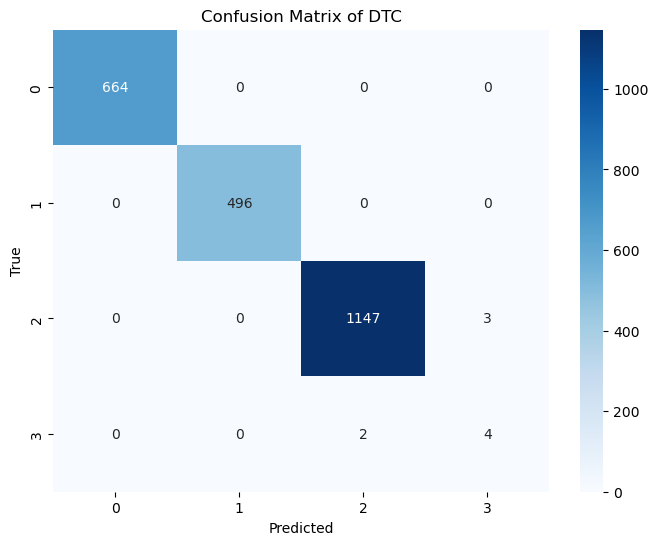

Classification Report of DTC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00      1150
           3       0.57      0.67      0.62         6

    accuracy                           1.00      2316
   macro avg       0.89      0.92      0.90      2316
weighted avg       1.00      1.00      1.00      2316



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of DTC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of DTC:')
print(class_report)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RFC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of RFC:')
print(class_report)


Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 2 ... 2 2 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Classification Report of RFC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00      1150
           3       0.83      0.83      0.83         6

    accuracy                           1.00      2316
   macro avg       0.96      0.96      0.96      2316
weighted avg       1.00      1.00      1.00      2316



Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [2 0 2 ... 2 2 2]
Accuracy: 0.78
Precision: 0.63
Recall: 0.78
F1 Score: 0.69


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


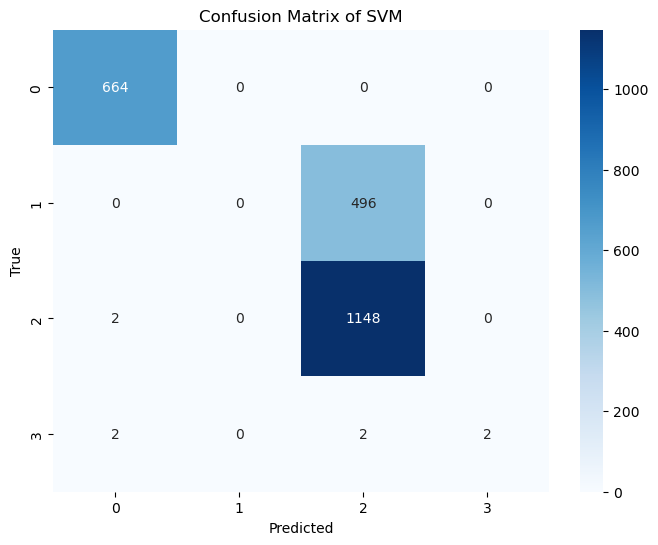

Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       664
           1       0.00      0.00      0.00       496
           2       0.70      1.00      0.82      1150
           3       1.00      0.33      0.50         6

    accuracy                           0.78      2316
   macro avg       0.67      0.58      0.58      2316
weighted avg       0.63      0.78      0.69      2316



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of SVM')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of SVM:')
print(class_report)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of KNC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of KNC:')
print(class_report)


Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 2 ... 2 2 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Classification Report of KNC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00      1150
           3       0.71      0.83      0.77         6

    accuracy                           1.00      2316
   macro avg       0.93      0.96      0.94      2316
weighted avg       1.00      1.00      1.00      2316



Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 2 ... 2 2 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


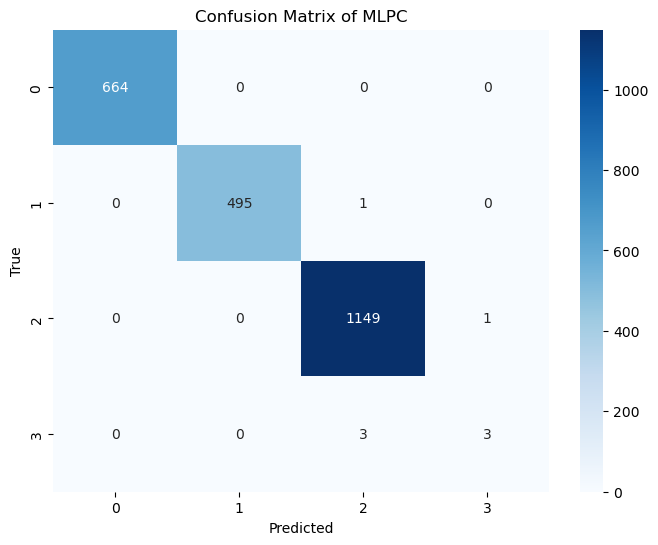

Classification Report of MLPC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00      1150
           3       0.75      0.50      0.60         6

    accuracy                           1.00      2316
   macro avg       0.94      0.87      0.90      2316
weighted avg       1.00      1.00      1.00      2316



In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of MLPC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of MLPC:')
print(class_report)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
y_pred=np.round(y_pred)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of LR')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of LR:')
print(class_report)


Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [ 1. -0.  2. ...  2.  2.  1.]
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report of LR:
              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         0
         0.0       1.00      0.99      1.00       664
         1.0       0.98      0.99      0.98       496
         2.0       0.99      1.00      0.99      1150
         3.0       0.67      0.33      0.44         6

    accuracy                           0.99      2316
   macro avg       0.73      0.66      0.68      2316
weighted avg       0.99      0.99      0.99      2316



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train,y_train)
y_pred = ada_boost.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of ABC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of ABC:')
print(class_report)


Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 3 ... 2 3 2]
Accuracy: 0.86
Precision: 0.94
Recall: 0.86
F1 Score: 0.89


Classification Report of ABC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      0.75      0.86       496
           2       0.88      0.82      0.85      1150
           3       0.00      0.17      0.01         6

    accuracy                           0.86      2316
   macro avg       0.72      0.69      0.68      2316
weighted avg       0.94      0.86      0.89      2316



In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
extra_tree = DecisionTreeClassifier()
extra_tree.fit(x_train,y_train)
y_pred = extra_tree.predict(x_test)
print("Original y_test values are ",y_test)
print("predicted y_test values are",y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of ETC')
plt.show()
class_report = classification_report(y_test, y_pred)
print('Classification Report of ETC:')
print(class_report)


Original y_test values are  [1 0 2 ... 2 2 1]
predicted y_test values are [1 0 2 ... 2 2 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Classification Report of ETC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00      1150
           3       0.67      0.67      0.67         6

    accuracy                           1.00      2316
   macro avg       0.92      0.92      0.92      2316
weighted avg       1.00      1.00      1.00      2316

